
----- DATASET INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN



----- MISSING VALUES -----
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Duplicate rows before: 0
Duplicate rows after: 0


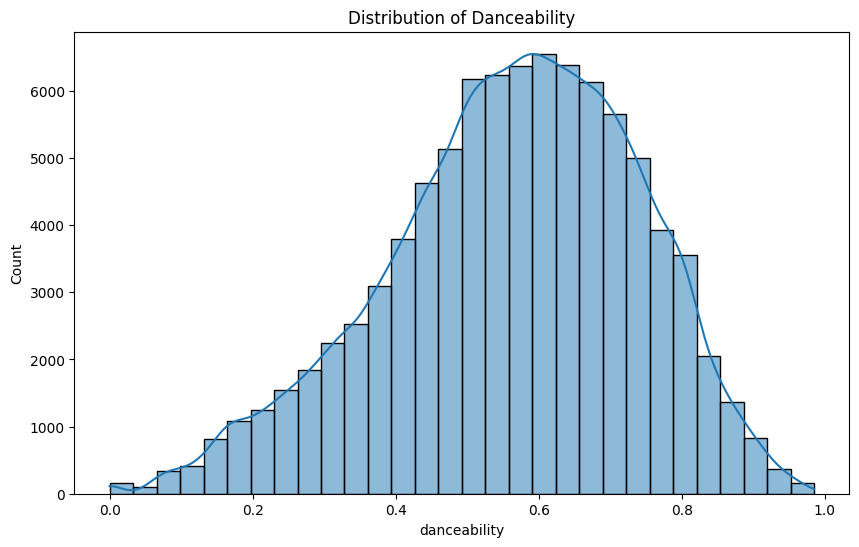

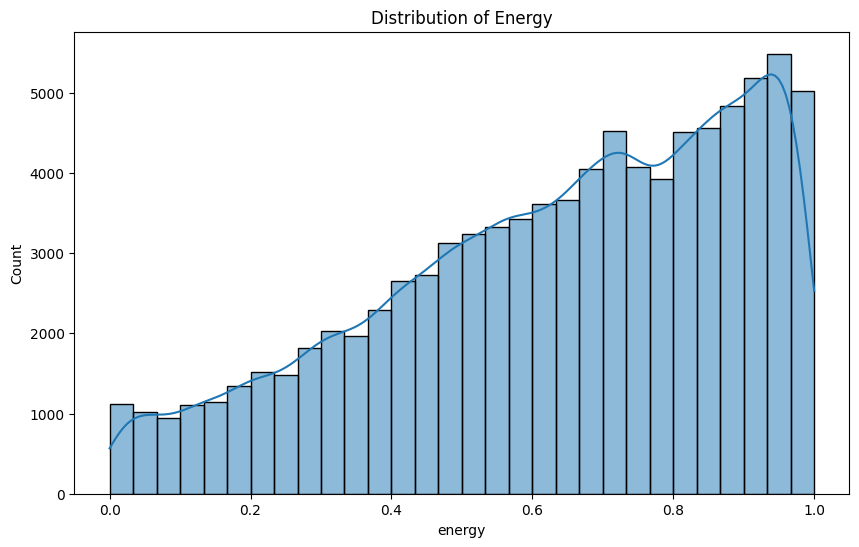

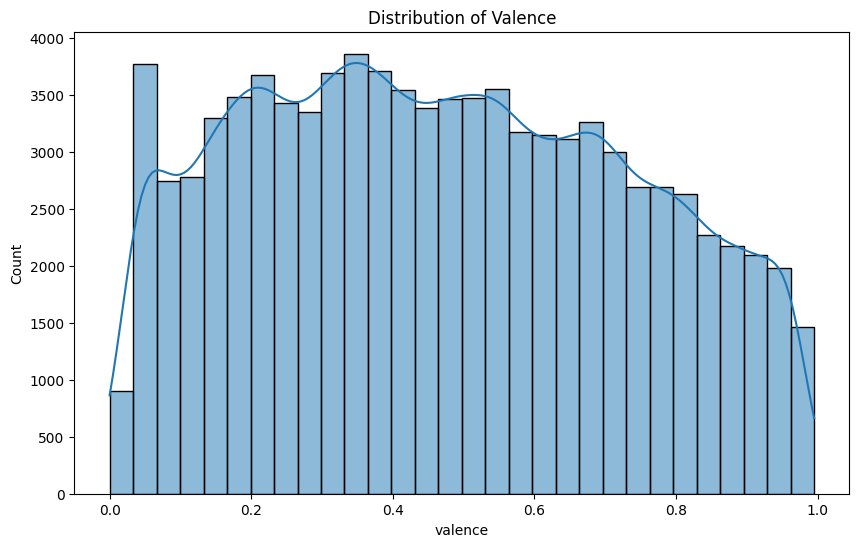

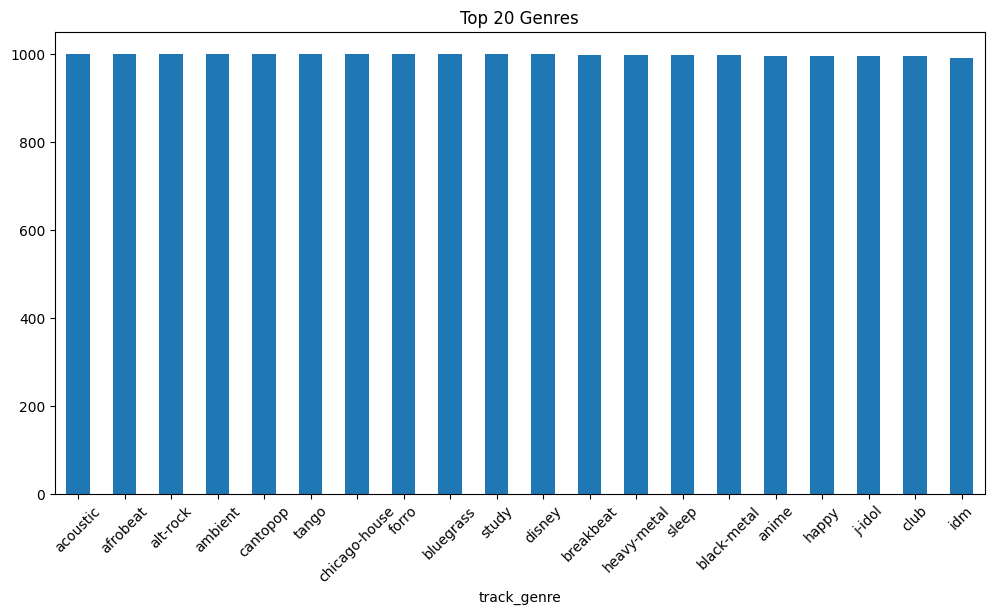

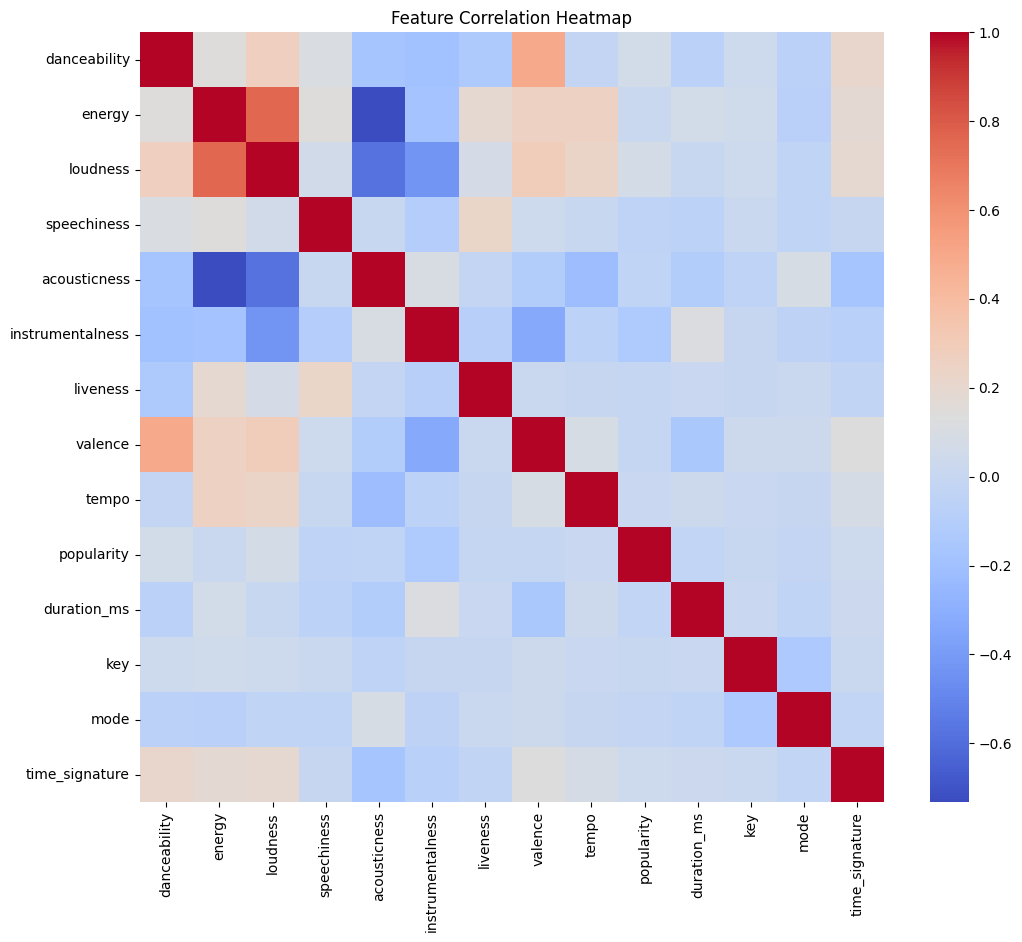


Cleaned Spotify dataset saved!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pd.read_csv("../data/dataset.csv")
spotify_df.head()

print("\n----- DATASET INFO -----")
spotify_df.info()

print("\n----- DESCRIPTIVE STATS -----")
display(spotify_df.describe(include='all'))  # include text columns

print("\n----- MISSING VALUES -----")
print(spotify_df.isna().sum())

num_cols = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "popularity",
    "duration_ms", "key", "mode", "time_signature"
]

spotify_df[num_cols] = spotify_df[num_cols].fillna(spotify_df[num_cols].median())

text_cols = ["track_id", "track_name", "artists", "album_name", "track_genre"]
spotify_df[text_cols] = spotify_df[text_cols].fillna("Unknown")

if "explicit" in spotify_df.columns:
    spotify_df["explicit"] = spotify_df["explicit"].fillna(False).astype(int)

print("\nDuplicate rows before:", spotify_df.duplicated().sum())

spotify_df.drop_duplicates(subset=["track_id"], inplace=True)

print("Duplicate rows after:", spotify_df.duplicated().sum())


# Danceability distribution
plt.figure(figsize=(10,6))
sns.histplot(spotify_df["danceability"], bins=30, kde=True)
plt.title("Distribution of Danceability")
plt.show()

# Energy distribution
plt.figure(figsize=(10,6))
sns.histplot(spotify_df["energy"], bins=30, kde=True)
plt.title("Distribution of Energy")
plt.show()

# Valence distribution
plt.figure(figsize=(10,6))
sns.histplot(spotify_df["valence"], bins=30, kde=True)
plt.title("Distribution of Valence")
plt.show()

# Genre distribution (top 20)
plt.figure(figsize=(12,6))
spotify_df["track_genre"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Genres")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(spotify_df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


spotify_df.to_csv("../data/spotify_clean.csv", index=False)
print("\nCleaned Spotify dataset saved!")